# # Logistic Regression: Three Implementation Methods
# 
# This notebook demonstrates three different approaches to implement logistic regression:
# 1. *Library Implementation* - Using scikit-learn
# 2. *Manual Analytical Solution* - Using Newton-Raphson method  
# 3. *Gradient Descent Implementation* - Custom implementation from scratch

---
---

# 2.Logistic Regression - Manual Analytical Derivation (Newton-Raphson Method)

## Maximum Likelihood Estimation Approach

### Log-Likelihood Function:
$$\ell(\theta) = \sum_{i=1}^{m} \left[ y^{(i)} \log(h_\theta(x^{(i)})) + (1-y^{(i)}) \log(1-h_\theta(x^{(i)})) \right]$$

### Hypothesis Function (Sigmoid):
$$h_\theta(x) = \frac{1}{1 + e^{-\theta^T x}}$$

### First Derivative (Gradient):
$$\frac{\partial \ell(\theta)}{\partial \theta_j} = \sum_{i=1}^{m} (y^{(i)} - h_\theta(x^{(i)})) x_j^{(i)}$$


### Second Derivative (Hessian Matrix):
$$\frac{\partial^2 \ell(\theta)}{\partial \theta_j \partial \theta_k} = -\sum_{i=1}^{m} h_\theta(x^{(i)})(1-h_\theta(x^{(i)})) x_j^{(i)} x_k^{(i)}$$


where $W$ is a diagonal matrix with:
$$W_{ii} = h_\theta(x^{(i)})(1-h_\theta(x^{(i)}))$$

### Newton-Raphson Update Rule:
$$\theta^{(t+1)} = \theta^{(t)} - H^{-1} \nabla \ell(\theta^{(t)})$$

### Expanded Newton-Raphson Formula:
$$\theta^{(t+1)} = \theta^{(t)} + (X^T W X)^{-1} X^T (y - h_\theta(X))$$

---

## Key Differences from Linear Regression:

1. **No Closed-Form Solution**: Unlike linear regression, logistic regression doesn't have a direct closed-form solution
2. **Iterative Method Required**: Newton-Raphson is used to find the maximum likelihood estimate
3. **Non-Linear Optimization**: The sigmoid function makes this a non-linear optimization problem
4. **Second-Order Method**: Uses both gradient (first derivative) and Hessian (second derivative)

---
---


## 3.Logistic Regression - Gradient Descent

### Cost Function (Log-Loss):
$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_\theta(x^{(i)})) + (1-y^{(i)}) \log(1-h_\theta(x^{(i)})) \right]$$

### Hypothesis Function (Sigmoid):
$$h_\theta(x) = g(\theta^T x) = \frac{1}{1 + e^{-\theta^T x}}$$

### Sigmoid Function:
$$g(z) = \frac{1}{1 + e^{-z}}$$

### Gradient Descent Update Rule:
$$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta)$$

### Partial Derivative:
$$\frac{\partial}{\partial \theta_j} J(\theta) = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}$$

### Final Update Rule:
$$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}$$

---
---

# ## Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score , classification_report,precision_recall_curve, roc_auc_score, roc_curve


In [2]:
df_net = pd.read_csv('Social_Network_Ads.csv')
df_net.drop(columns=['User ID'] , inplace=True)

In [3]:
df_net.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [4]:
le = LabelEncoder()
df_net['Gender'] = le.fit_transform(df_net['Gender'])


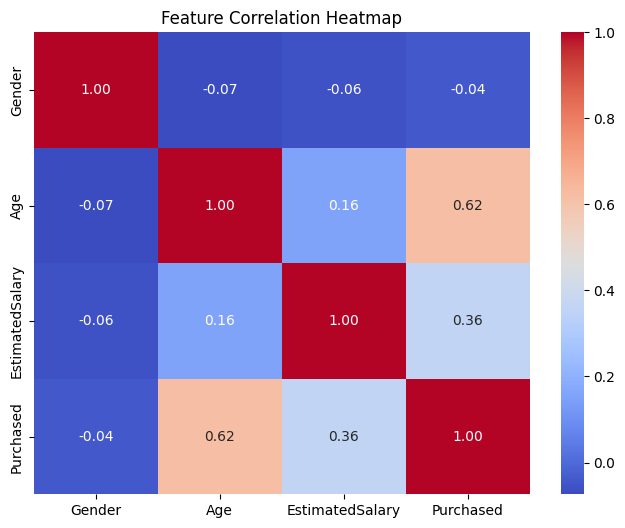

In [5]:
# Calculate correlation matrix
correlation_matrix = df_net.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [6]:
df_net.drop(columns=['Gender'] , inplace=True)

In [7]:
X = df_net.iloc[: , :-1].values
y = df_net.iloc[:,-1].values

In [8]:
X_train,X_test ,y_train, y_test = train_test_split(X , y , test_size=0.25 , random_state=True)

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
print("Data preprocessing completed!")
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"Features: {X_train.shape[1]}")

Data preprocessing completed!
Training set size: (300, 2)
Test set size: (100, 2)
Features: 2


---
---


# 
# # Method 1: Library Implementation (Scikit-learn)
# 
# Using the built-in LogisticRegression from scikit-learn library.

In [11]:
model_sklearn = LogisticRegression(
    random_state=42,
    max_iter=1000,
    solver='liblinear'  # Best for small datasets
)
model_sklearn.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [12]:
y_pred_sklearn = model_sklearn.predict(X_test_scaled)
y_prob_sklearn = model_sklearn.predict_proba(X_test_scaled)[:, 1]

In [13]:
# Metrics
acc_sklearn = accuracy_score(y_test, y_pred_sklearn)
auc_sklearn = roc_auc_score(y_test, y_prob_sklearn)

In [14]:
print("=== SCIKIT-LEARN RESULTS ===")
print(f"Accuracy (Scikit-learn): {acc_sklearn:.4f}")
print(f"AUC Score: {auc_sklearn:.4f}")
print("\nClassification Report (Scikit-learn):")
print(classification_report(y_test, y_pred_sklearn))

=== SCIKIT-LEARN RESULTS ===
Accuracy (Scikit-learn): 0.8400
AUC Score: 0.9130

Classification Report (Scikit-learn):
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        58
           1       0.84      0.76      0.80        42

    accuracy                           0.84       100
   macro avg       0.84      0.83      0.83       100
weighted avg       0.84      0.84      0.84       100



---
---


# # Method 2: Manual Analytical Solution (Newton-Raphson Method)
# 
# Implementing logistic regression using the Newton-Raphson optimization method for finding optimal parameters analytically.

In [15]:
# METHOD 2: Newton-Raphson (Analytical Solution)
class LogisticRegressionNewton:
    """Newton-Raphson implementation for Logistic Regression"""
    
    def __init__(self, max_iter=100, tol=1e-6):
        self.max_iter = max_iter
        self.tol = tol
        self.coef_ = None
        self.intercept_ = None
        self.n_iter_ = None
    
    @staticmethod
    def sigmoid(z):
        """Numerically stable sigmoid function"""
        z = np.clip(z, -500, 500)
        return np.where(z >= 0, 
                       1 / (1 + np.exp(-z)),
                       np.exp(z) / (1 + np.exp(z)))
    
    def fit(self, X, y):
        """Fit the model using Newton-Raphson method"""
        n_samples, n_features = X.shape
        
        # Add intercept column
        X_with_intercept = np.column_stack([np.ones(n_samples), X])
        
        # Initialize parameters
        theta = np.zeros(n_features + 1)
        
        for iteration in range(self.max_iter):
            # Predictions
            z = X_with_intercept @ theta
            predictions = self.sigmoid(z)
            
            # Gradient (first derivative)
            gradient = X_with_intercept.T @ (predictions - y) / n_samples
            
            # Hessian (second derivative)
            weights = predictions * (1 - predictions)
            hessian = (X_with_intercept.T * weights) @ X_with_intercept / n_samples
            
            # Newton-Raphson update
            try:
                theta_update = np.linalg.solve(hessian, gradient)
                theta_new = theta - theta_update
            except np.linalg.LinAlgError:
                # Use pseudo-inverse if hessian is singular
                theta_new = theta - np.linalg.pinv(hessian) @ gradient
            
            # Check convergence
            if np.linalg.norm(theta_new - theta) < self.tol:
                self.n_iter_ = iteration + 1
                break
                
            theta = theta_new
        else:
            self.n_iter_ = self.max_iter
        
        # Store parameters
        self.intercept_ = theta[0]
        self.coef_ = theta[1:]
        
        return self
    
    def predict_proba(self, X):
        """Predict class probabilities"""
        z = X @ self.coef_ + self.intercept_
        prob_positive = self.sigmoid(z)
        return np.column_stack([1 - prob_positive, prob_positive])
    
    def predict(self, X):
        """Make binary predictions"""
        return (self.predict_proba(X)[:, 1] >= 0.5).astype(int)

# Train Newton-Raphson model
model_newton = LogisticRegressionNewton(max_iter=100, tol=1e-6)
model_newton.fit(X_train_scaled, y_train)

y_pred_newton = model_newton.predict(X_test_scaled)
y_prob_newton = model_newton.predict_proba(X_test_scaled)[:, 1]

acc_newton = accuracy_score(y_test, y_pred_newton)
auc_newton = roc_auc_score(y_test, y_prob_newton)

print("=== NEWTON-RAPHSON RESULTS ===")
print(f"Accuracy: {acc_newton:.4f}")
print(f"AUC Score: {auc_newton:.4f}")
print(f"Converged in {model_newton.n_iter_} iterations")
print("\nClassification Report (Newton-Raphson):")
print(classification_report(y_test, y_pred_newton))


=== NEWTON-RAPHSON RESULTS ===
Accuracy: 0.8400
AUC Score: 0.9130
Converged in 7 iterations

Classification Report (Newton-Raphson):
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        58
           1       0.84      0.76      0.80        42

    accuracy                           0.84       100
   macro avg       0.84      0.83      0.83       100
weighted avg       0.84      0.84      0.84       100



---
---

# 
# # Method 3: Gradient Descent Implementation
# 
# Implementing logistic regression from scratch using gradient descent optimization.

In [16]:
class LogisticRegressionGD:
    """Gradient Descent implementation for Logistic Regression"""
    
    def __init__(self, learning_rate=0.01, max_iter=1000, tol=1e-6):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.tol = tol
        self.coef_ = None
        self.intercept_ = None
        self.cost_history_ = []
        self.n_iter_ = None
    
    @staticmethod
    def sigmoid(z):
        """Numerically stable sigmoid function"""
        z = np.clip(z, -500, 500)
        return np.where(z >= 0, 
                       1 / (1 + np.exp(-z)),
                       np.exp(z) / (1 + np.exp(z)))
    
    def cost_function(self, y_true, y_pred):
        """Logistic regression cost function (log-loss)"""
        epsilon = 1e-15  # Small value to prevent log(0)
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    
    def fit(self, X, y):
        """Fit the model using gradient descent"""
        n_samples, n_features = X.shape
        
        # Initialize parameters
        self.coef_ = np.random.normal(0, 0.01, n_features)
        self.intercept_ = 0
        
        prev_cost = float('inf')
        
        for iteration in range(self.max_iter):
            # Forward pass
            z = X @ self.coef_ + self.intercept_
            predictions = self.sigmoid(z)
            
            # Calculate cost
            cost = self.cost_function(y, predictions)
            self.cost_history_.append(cost)
            
            # Calculate gradients
            dw = (X.T @ (predictions - y)) / n_samples
            db = np.mean(predictions - y)
            
            # Update parameters
            self.coef_ -= self.learning_rate * dw
            self.intercept_ -= self.learning_rate * db
            
            # Check convergence
            if abs(prev_cost - cost) < self.tol:
                self.n_iter_ = iteration + 1
                break
                
            prev_cost = cost
        else:
            self.n_iter_ = self.max_iter
        
        return self
    
    def predict_proba(self, X):
        """Predict class probabilities"""
        z = X @ self.coef_ + self.intercept_
        prob_positive = self.sigmoid(z)
        return np.column_stack([1 - prob_positive, prob_positive])
    
    def predict(self, X):
        """Make binary predictions"""
        return (self.predict_proba(X)[:, 1] >= 0.5).astype(int)

# Train Gradient Descent model
model_gd = LogisticRegressionGD(learning_rate=0.1, max_iter=1000, tol=1e-6)
model_gd.fit(X_train_scaled, y_train)

y_pred_gd = model_gd.predict(X_test_scaled)
y_prob_gd = model_gd.predict_proba(X_test_scaled)[:, 1]

acc_gd = accuracy_score(y_test, y_pred_gd)
auc_gd = roc_auc_score(y_test, y_prob_gd)

print("=== GRADIENT DESCENT RESULTS ===")
print(f"Accuracy: {acc_gd:.4f}")
print(f"AUC Score: {auc_gd:.4f}")
print(f"Converged in {model_gd.n_iter_} iterations")
print("Classification Report (Gradient Descent):")
print(classification_report(y_test, y_pred_gd))


=== GRADIENT DESCENT RESULTS ===
Accuracy: 0.8400
AUC Score: 0.9130
Converged in 1000 iterations
Classification Report (Gradient Descent):
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        58
           1       0.84      0.76      0.80        42

    accuracy                           0.84       100
   macro avg       0.84      0.83      0.83       100
weighted avg       0.84      0.84      0.84       100



---
---


# 
# # Results Comparison and Visualization

=== FINAL COMPARISON ===
          Method  Accuracy  AUC Score Iterations
    Scikit-learn      0.84   0.912972        N/A
  Newton-Raphson      0.84   0.912972          7
Gradient Descent      0.84   0.912972       1000


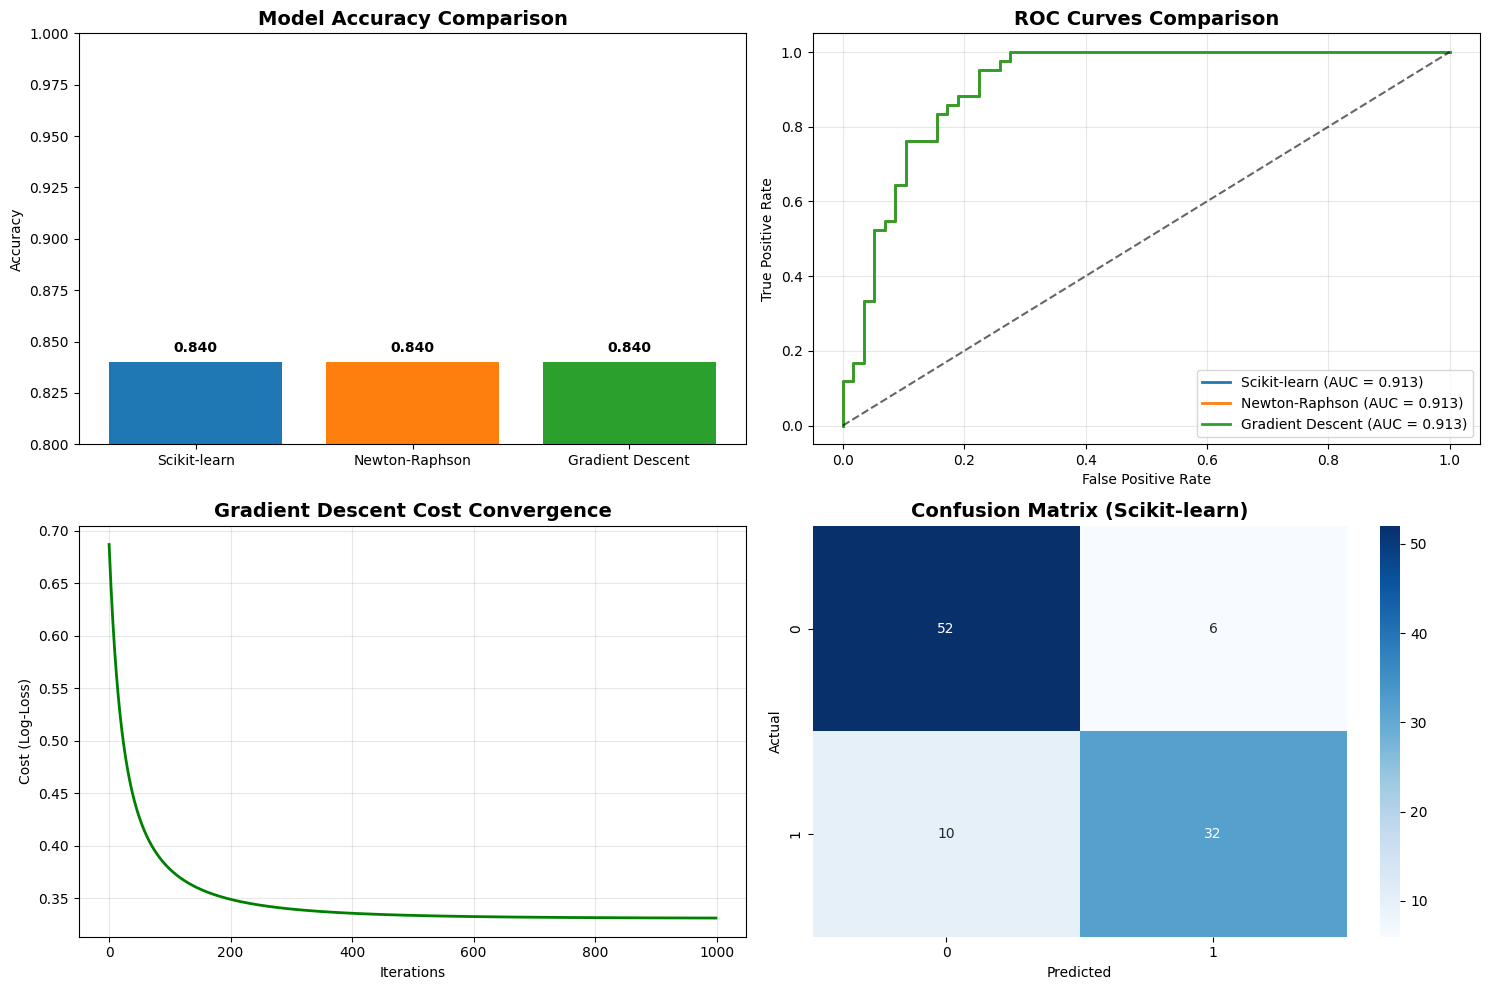


=== MODEL PARAMETERS ===
Scikit-learn coefficients: [2.20582315 1.35440067]
Newton-Raphson coefficients: [2.5256213  1.54075435]
Gradient Descent coefficients: [2.39972188 1.46813358]


In [17]:
# Results summary
results_df = pd.DataFrame({
    'Method': ['Scikit-learn', 'Newton-Raphson', 'Gradient Descent'],
    'Accuracy': [acc_sklearn, acc_newton, acc_gd],
    'AUC Score': [auc_sklearn, auc_newton, auc_gd],
    'Iterations': ['N/A', model_newton.n_iter_, model_gd.n_iter_]
})

print("=== FINAL COMPARISON ===")
print(results_df.to_string(index=False))

# Professional visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# 1. Accuracy comparison
methods = results_df['Method']
accuracies = results_df['Accuracy']
bars = ax1.bar(methods, accuracies, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
ax1.set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
ax1.set_ylabel('Accuracy')
ax1.set_ylim(0.8, 1.0)
for bar, acc in zip(bars, accuracies):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
             f'{acc:.3f}', ha='center', fontweight='bold')

# 2. ROC Curves
fpr_sklearn, tpr_sklearn, _ = roc_curve(y_test, y_prob_sklearn)
fpr_newton, tpr_newton, _ = roc_curve(y_test, y_prob_newton)
fpr_gd, tpr_gd, _ = roc_curve(y_test, y_prob_gd)

ax2.plot(fpr_sklearn, tpr_sklearn, label=f'Scikit-learn (AUC = {auc_sklearn:.3f})', linewidth=2)
ax2.plot(fpr_newton, tpr_newton, label=f'Newton-Raphson (AUC = {auc_newton:.3f})', linewidth=2)
ax2.plot(fpr_gd, tpr_gd, label=f'Gradient Descent (AUC = {auc_gd:.3f})', linewidth=2)
ax2.plot([0, 1], [0, 1], 'k--', alpha=0.6)
ax2.set_title('ROC Curves Comparison', fontsize=14, fontweight='bold')
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Cost convergence
ax3.plot(model_gd.cost_history_, linewidth=2, color='green')
ax3.set_title('Gradient Descent Cost Convergence', fontsize=14, fontweight='bold')
ax3.set_xlabel('Iterations')
ax3.set_ylabel('Cost (Log-Loss)')
ax3.grid(True, alpha=0.3)

# 4. Confusion matrices
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm_sklearn = confusion_matrix(y_test, y_pred_sklearn)
sns.heatmap(cm_sklearn, annot=True, fmt='d', cmap='Blues', ax=ax4)
ax4.set_title('Confusion Matrix (Scikit-learn)', fontsize=14, fontweight='bold')
ax4.set_xlabel('Predicted')
ax4.set_ylabel('Actual')

plt.tight_layout()
plt.show()

print(f"\n=== MODEL PARAMETERS ===")
print(f"Scikit-learn coefficients: {model_sklearn.coef_[0]}")
print(f"Newton-Raphson coefficients: {model_newton.coef_}")
print(f"Gradient Descent coefficients: {model_gd.coef_}")


In [25]:
# SAMPLE PREDICTION - CORRECTED VERSION

sample_input_male = [[45, 97000]]  # [Age, EstimatedSalary]
sample_scaled = scaler.transform(sample_input_male)

print("=== PREDICTION FOR AGE=45, SALARY=97000 ===")
print(f"Scikit-learn prediction: {model_sklearn.predict(sample_scaled)[0]}")
print(f"Newton-Raphson prediction: {model_newton.predict(sample_scaled)[0]}")
print(f"Gradient Descent prediction: {model_gd.predict(sample_scaled)[0]}")

# Get probabilities too
print(f"Scikit-learn probability: {model_sklearn.predict_proba(sample_scaled)[0][1]:.4f}")
print(f"Newton-Raphson probability: {model_newton.predict_proba(sample_scaled)[0][1]:.4f}")
print(f"Gradient Descent probability: {model_gd.predict_proba(sample_scaled)[0][1]:.4f}")

print("\n" + "="*50)

# Example 2: Age=45, Salary=97000
sample_input_female = [[45, 97000]]  # [Age, EstimatedSalary]
sample_scaled_female = scaler.transform(sample_input_female)

print("=== PREDICTION FOR AGE=45, SALARY=97000 ===")
print(f"Scikit-learn prediction: {model_sklearn.predict(sample_scaled_female)[0]}")
print(f"Newton-Raphson prediction: {model_newton.predict(sample_scaled_female)[0]}")
print(f"Gradient Descent prediction: {model_gd.predict(sample_scaled_female)[0]}")

print(f"Scikit-learn probability: {model_sklearn.predict_proba(sample_scaled_female)[0][1]:.4f}")
print(f"Newton-Raphson probability: {model_newton.predict_proba(sample_scaled_female)[0][1]:.4f}")
print(f"Gradient Descent probability: {model_gd.predict_proba(sample_scaled_female)[0][1]:.4f}")


=== PREDICTION FOR AGE=45, SALARY=97000 ===
Scikit-learn prediction: 1
Newton-Raphson prediction: 1
Gradient Descent prediction: 1
Scikit-learn probability: 0.8341
Newton-Raphson probability: 0.8667
Gradient Descent probability: 0.8543

=== PREDICTION FOR AGE=45, SALARY=97000 ===
Scikit-learn prediction: 1
Newton-Raphson prediction: 1
Gradient Descent prediction: 1
Scikit-learn probability: 0.8341
Newton-Raphson probability: 0.8667
Gradient Descent probability: 0.8543


In [26]:
# MULTIPLE PREDICTIONS WITHOUT GENDER
test_cases = [
    [45, 97000],   # Age=45, Salary=97k
    [25, 35000],   # Age=25, Salary=35k
    [35, 80000],   # Age=35, Salary=80k
    [50, 120000],  # Age=50, Salary=120k
    [22, 25000],   # Age=22, Salary=25k
]

test_cases_scaled = scaler.transform(test_cases)

print("=== MULTIPLE PREDICTIONS ===")
print("Format: [Age, Salary] -> Prediction (Probability)")
print("-" * 50)

for i, (original, scaled) in enumerate(zip(test_cases, test_cases_scaled)):
    # Get predictions from all three models
    pred_sklearn = model_sklearn.predict([scaled])[0]
    pred_newton = model_newton.predict([scaled])[0]
    pred_gd = model_gd.predict([scaled])[0]
    
    # Get probabilities
    prob_sklearn = model_sklearn.predict_proba([scaled])[0][1]
    prob_newton = model_newton.predict_proba([scaled])[0][1]
    prob_gd = model_gd.predict_proba([scaled])[0][1]
    
    print(f"Age={original[0]}, Salary=${original[1]:,}")
    print(f"  Scikit-learn:    {pred_sklearn} ({prob_sklearn:.4f})")
    print(f"  Newton-Raphson:  {pred_newton} ({prob_newton:.4f})")
    print(f"  Gradient Descent: {pred_gd} ({prob_gd:.4f})")
    print()


=== MULTIPLE PREDICTIONS ===
Format: [Age, Salary] -> Prediction (Probability)
--------------------------------------------------
Age=45, Salary=$97,000
  Scikit-learn:    1 (0.8341)
  Newton-Raphson:  1 (0.8667)
  Gradient Descent: 1 (0.8543)

Age=25, Salary=$35,000
  Scikit-learn:    0 (0.0055)
  Newton-Raphson:  0 (0.0027)
  Gradient Descent: 0 (0.0036)

Age=35, Salary=$80,000
  Scikit-learn:    0 (0.2261)
  Newton-Raphson:  0 (0.2008)
  Gradient Descent: 0 (0.2100)

Age=50, Salary=$120,000
  Scikit-learn:    1 (0.9739)
  Newton-Raphson:  1 (0.9846)
  Gradient Descent: 1 (0.9810)

Age=22, Salary=$25,000
  Scikit-learn:    0 (0.0019)
  Newton-Raphson:  0 (0.0008)
  Gradient Descent: 0 (0.0011)

